In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,11)

In [3]:
df = pd.read_csv("D:\AI Engineer\AIEngineer\ProjectML\ProjectML1\dataset\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df2 = df.drop(['area_type','availability','balcony','society'], axis= 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3.shape

(13246, 5)

In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3['bhk'] = df3["size"].apply(lambda x: int(x.split(" ")[0]))
df3.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_18908\3156391002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3["size"].apply(lambda x: int(x.split(" ")[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [16]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [17]:
df3["total_sqft"].tail(20)

13300    1500
13301    1454
13302    1075
13303     774
13304    1187
13305     500
13306    1200
13307    1805
13308    1527
13309    1675
13310    1050
13311    1500
13312    1262
13313    1345
13314    1715
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, dtype: object

In [18]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [19]:
df3[~df3['total_sqft'].apply(isFloat)].head(20)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [21]:
def convert_sqft_toNum(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return(float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
convert_sqft_toNum("2111")


2111.0

In [23]:
convert_sqft_toNum("2100 - 2850")


2475.0

In [24]:
convert_sqft_toNum("1000Sq. Meter")


In [25]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_toNum)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [26]:
df4[~df4['total_sqft'].apply(isFloat)]

,location,size,total_sqft,bath,price,bhk


In [27]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk         13246 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 724.4+ KB


In [28]:
df5 = df4.copy()
df5['price_persqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_persqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [29]:
len(df5['location'].unique())

1304

In [30]:
df5.location = df5.location.apply(lambda x: x.strip())

location_stats = df5.groupby("location")['location'].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [31]:
len(location_stats[location_stats<=10])

1052

In [32]:
locationLess10 = location_stats[location_stats<=10]
locationLess10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [33]:
df5.location = df5.location.apply(lambda x: "other" if x in locationLess10 else x)
len(df5.location.unique())

242

In [34]:
df5['location'].value_counts().sort_values(ascending=False)

other                        2881
Whitefield                    535
Sarjapur  Road                392
Electronic City               304
Kanakpura Road                266
                             ... 
Marsur                         11
Tindlu                         11
Thyagaraja Nagar               11
2nd Phase Judicial Layout      11
Narayanapura                   11
Name: location, Length: 242, dtype: int64

In [36]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_persqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [41]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       13246 non-null  object 
 1   size           13246 non-null  object 
 2   total_sqft     13200 non-null  float64
 3   bath           13246 non-null  float64
 4   price          13246 non-null  float64
 5   bhk            13246 non-null  int64  
 6   price_persqft  13200 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 827.9+ KB


In [40]:
df5[df5.total_sqft/df5.bhk>300].count()

location         12274
size             12274
total_sqft       12274
bath             12274
price            12274
bhk              12274
price_persqft    12274
dtype: int64

In [43]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]

In [44]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12502 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       12502 non-null  object 
 1   size           12502 non-null  object 
 2   total_sqft     12456 non-null  float64
 3   bath           12502 non-null  float64
 4   price          12502 non-null  float64
 5   bhk            12502 non-null  int64  
 6   price_persqft  12456 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 781.4+ KB


In [46]:
df6.price_persqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_persqft, dtype: float64

In [85]:
def remove_pps_outliers(df):
    dfOut = pd.DataFrame()
    for key ,subdf in df.groupby('location'):
        print(f"key : {key} , \nsubdf : {subdf}")
        m = np.mean(subdf.price_persqft)
        st = np.std(subdf.price_persqft)
        print(f"mean : {m} , st : {st}")
        print("\n\n")
        reduce_df = subdf[(subdf.price_persqft>(m-st)) & (subdf.price_persqft<=(m+st))]
        print(f"reduce df : {reduce_df.head()} \n\n")
        dfOut = pd.concat([dfOut,reduce_df],ignore_index= True)
        print(f"d fOut : {dfOut.head()} \n\n")
    
    return dfOut

In [91]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12502 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       12502 non-null  object 
 1   size           12502 non-null  object 
 2   total_sqft     12456 non-null  float64
 3   bath           12502 non-null  float64
 4   price          12502 non-null  float64
 5   bhk            12502 non-null  int64  
 6   price_persqft  12456 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 781.4+ KB


In [87]:
tes = df6.groupby('location')
tes.head()

,location,size,total_sqft,bath,price,bhk,price_persqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
9701,Banjara Layout,3 Bedroom,900.0,3.0,79.00,3,8777.777778
9879,Vishwapriya Layout,5 Bedroom,2800.0,5.0,130.00,5,4642.857143
10120,Shivaji Nagar,3 BHK,1300.0,3.0,170.00,3,13076.923077
10354,5th Block Hbr Layout,2 BHK,1100.0,2.0,48.00,2,4363.636364


In [97]:
df7 = remove_pps_outliers(df6)
df7.shape

key : 1st Block Jayanagar , 
subdf :                   location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

       price_persqft  
210     15017.543860  
848     11901.840491  
2152    12533.333333  
2355    18750.000000  
4991     6000.000000  
7138    10833.333333  
7358    11983.805668

(10241, 7)

In [95]:
df7.count()

location         10241
size             10241
total_sqft       10241
bath             10241
price            10241
bhk              10241
price_persqft    10241
dtype: int64

In [99]:
df7.location.value_counts()

other                   2301
Whitefield               479
Sarjapur  Road           296
Electronic City          279
Kanakpura Road           190
                        ... 
Vishveshwarya Layout       4
HAL 2nd Stage              4
Thyagaraja Nagar           4
Vishwapriya Layout         4
Marsur                     3
Name: location, Length: 242, dtype: int64

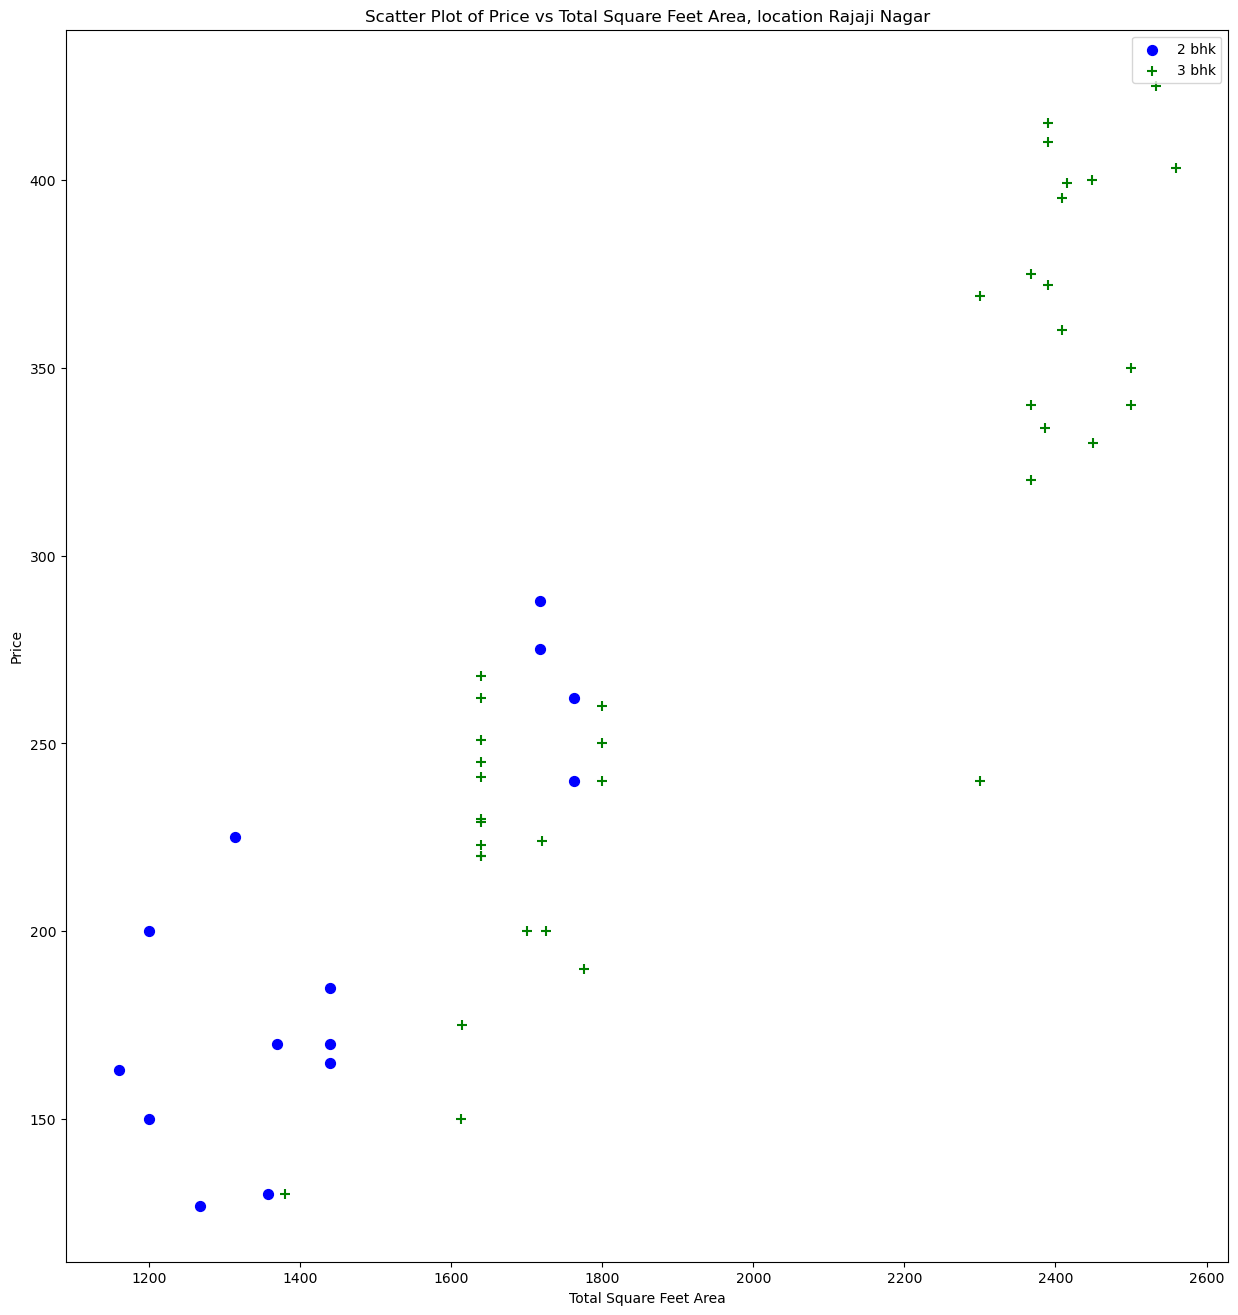

In [103]:
def plotScatter(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,16)
    plt.scatter(bhk2.total_sqft,bhk2.price,color = 'blue',label = '2 bhk', s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker= "+",color = 'green',label = "3 bhk", s= 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(f"Scatter Plot of Price vs Total Square Feet Area, location {location}")
    plt.legend()

plotScatter(df7,'Rajaji Nagar')

In [118]:
def remove_bhk_outlier(df):
    exclude_indices = np.array([])
    print(f"exclude indices : {exclude_indices}\n\n")
    for location, location_df in df.groupby('location'):
        print(f"location : {location} \n location_df : {location_df}\n\n")
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            print(f"bhk : {bhk}\n bhk_df : {bhk_df}\n\n")
            bhk_stats[bhk] = {
                "mean":np.mean(bhk_df.price_persqft),
                "std": np.mean(bhk_df.price_persqft),
                "count": bhk_df.shape[0]
            }
            print(f"bhk stats : {bhk_stats} \n")
            print(f"================================================")
        print(f"+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        for bhk,bhk_df in location_df.groupby('bhk'):
            print(f"bhk : {bhk}\n bhk_df : {bhk_df}\n\n")
            stats = bhk_stats.get(bhk-1)
            print(f"stats : {stats}\n")
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_persqft<(stats['mean'])].index.values)
                print(f"exclude indices : {exclude_indices}\n\n")
    print("----------------------------------done-------------------------------------")
    return df.drop(exclude_indices,axis='index')

In [121]:
df8 = remove_bhk_outlier(df7)
df8.shape

exclude indices : []


location : 1st Block Jayanagar 
 location_df :               location   size  total_sqft  bath  price  bhk  price_persqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4   15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3   11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3   12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3   10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2   11983.805668
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4   15018.181818
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4   15020.408163


bhk : 2
 bhk_df :               location   size  total_sqft  bath  price  bhk  price_persqft
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2   11983.805668


bhk stats : {2: {'mean': 11983.805668016194, 'std': 11983.805668016194, 'count': 1}} 

bhk : 3
 bhk_df :               location   size  total_sqft  bath  pric

(7329, 7)

In [122]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7329 entries, 0 to 10240
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       7329 non-null   object 
 1   size           7329 non-null   object 
 2   total_sqft     7329 non-null   float64
 3   bath           7329 non-null   float64
 4   price          7329 non-null   float64
 5   bhk            7329 non-null   int64  
 6   price_persqft  7329 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 458.1+ KB


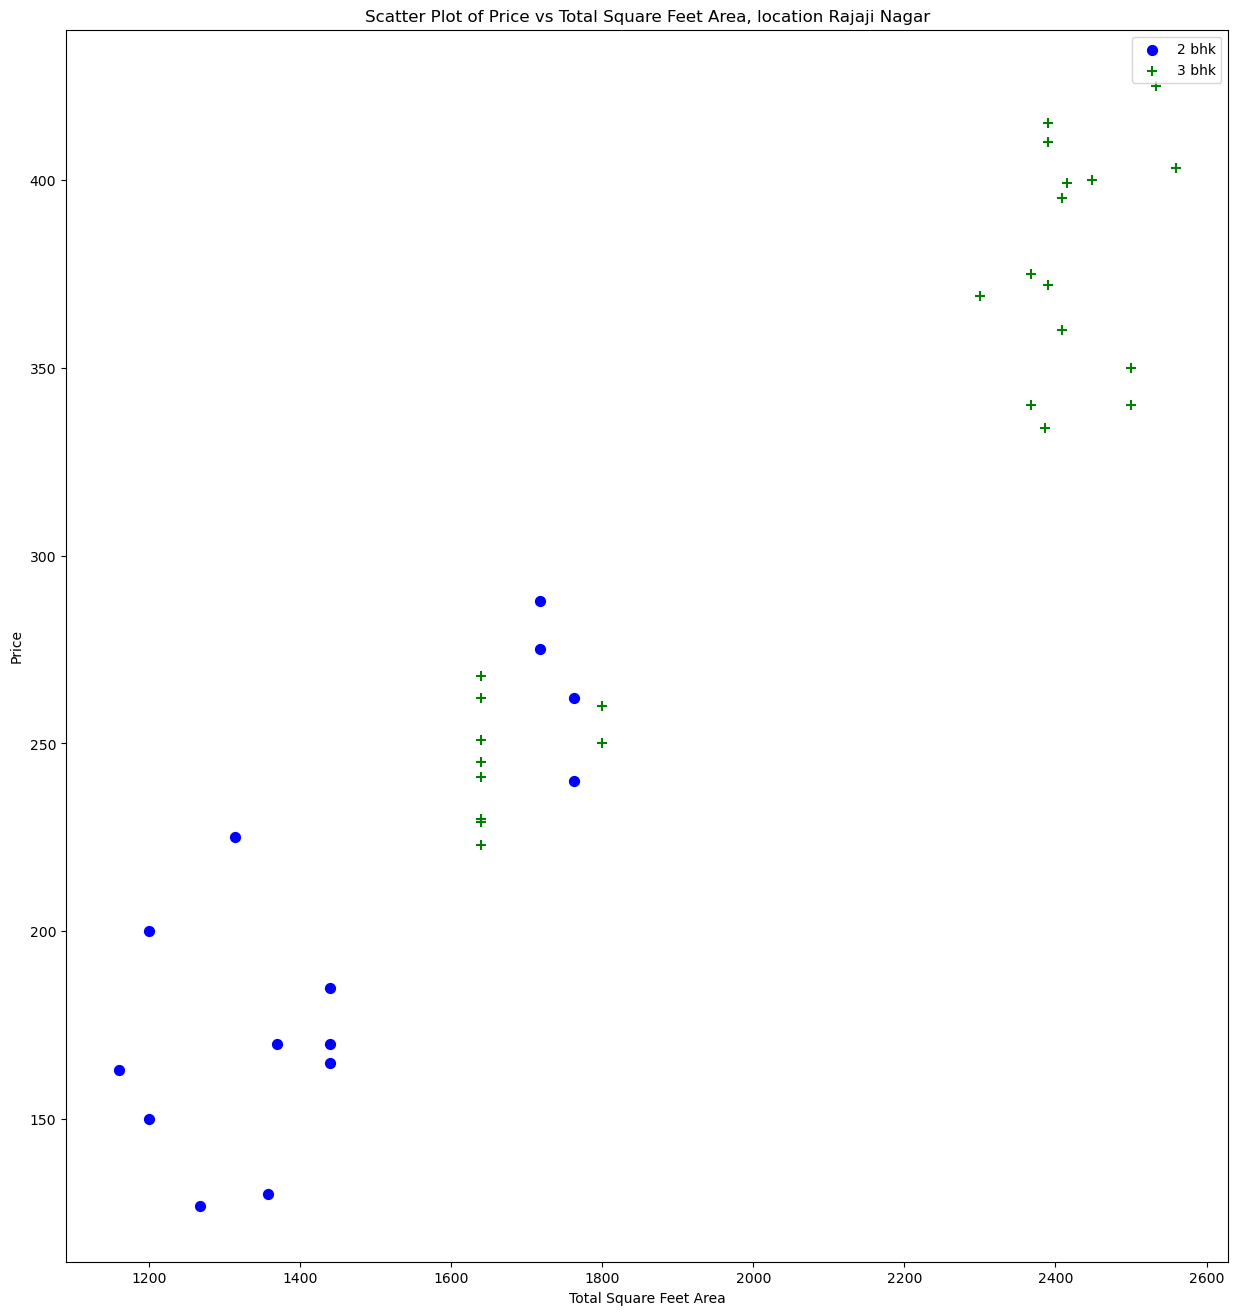

In [123]:
plotScatter(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

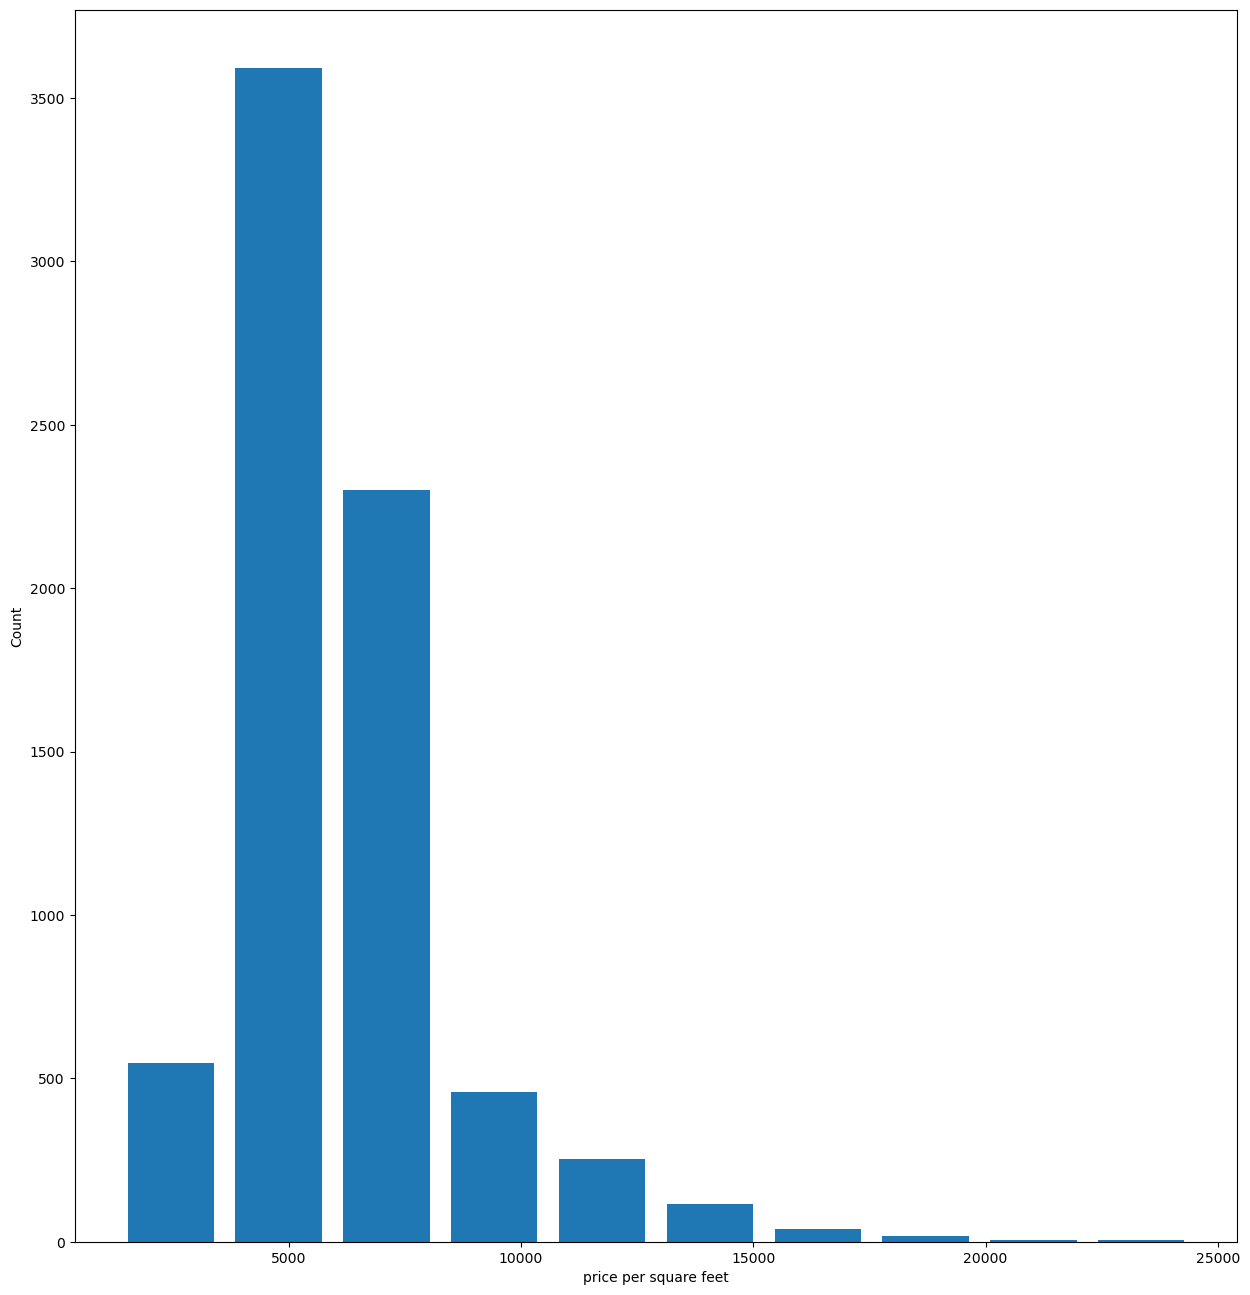

In [124]:
plt.hist(df8.price_persqft,rwidth=0.8)
plt.xlabel("price per square feet")
plt.ylabel("Count")

In [125]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [129]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_persqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

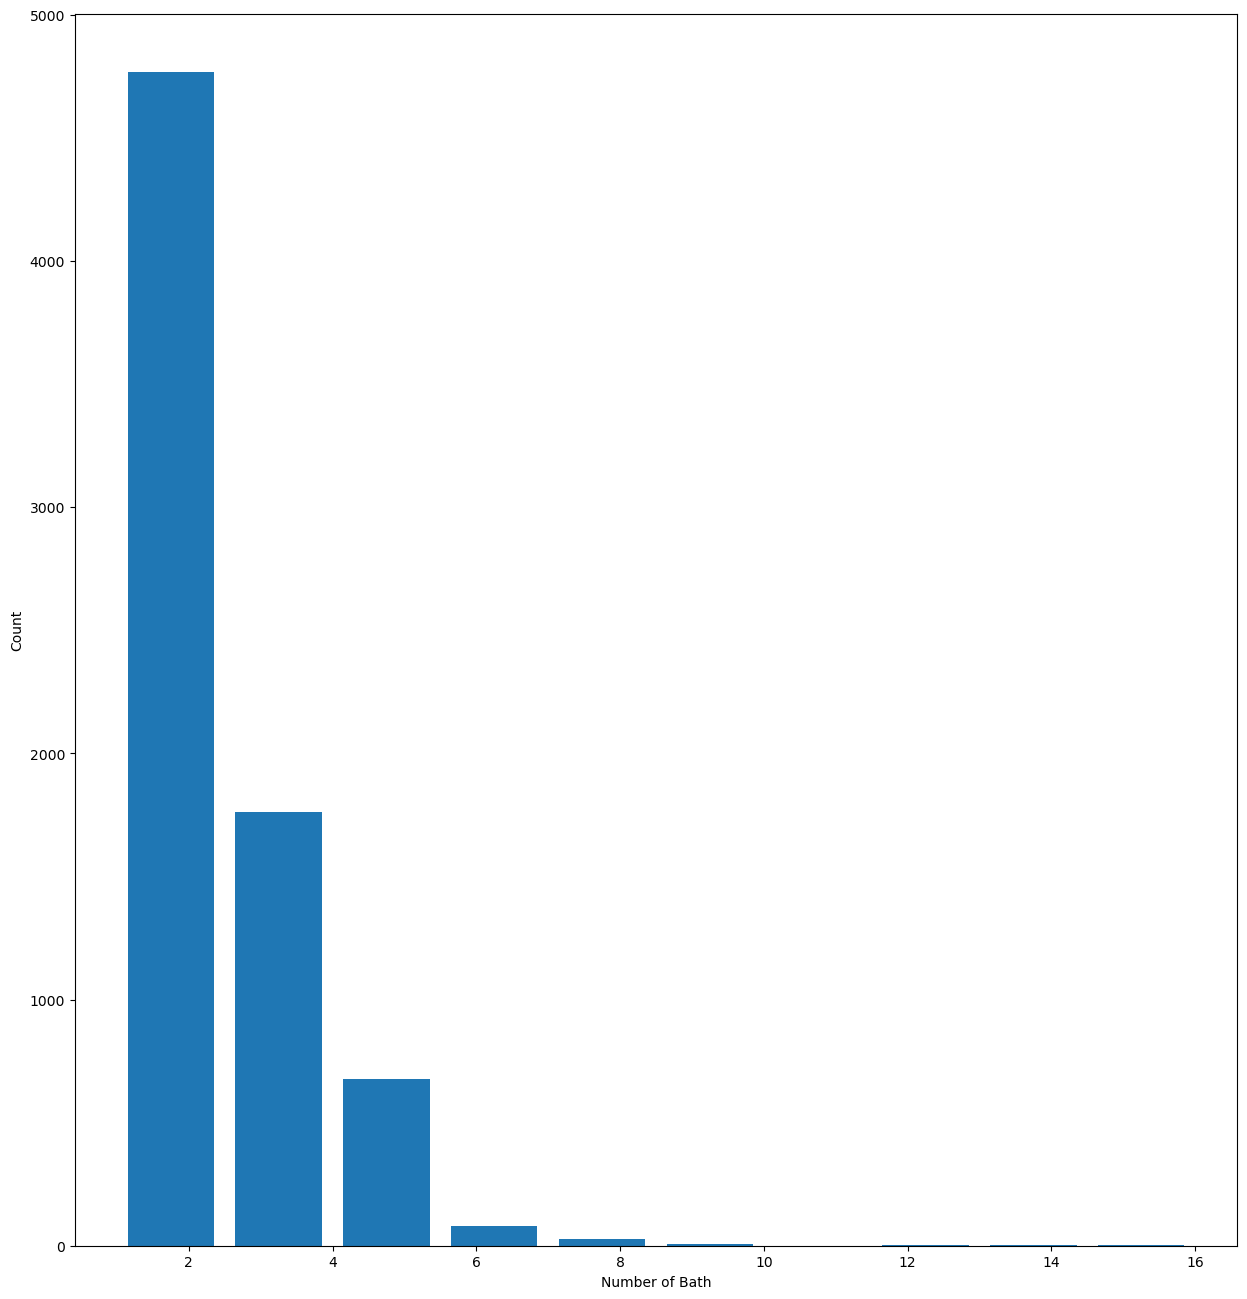

In [130]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of Bath")
plt.ylabel("Count")

In [131]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_persqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [132]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)